===========================================================================================================================
file:       benchmarks.jpynb
version:    21.7.2023
title:      BAC2 FH Salzburg: Federated Learning für Predictive Maintenance in Bereichen mit hohen Datenschutzanforderungen
author:     Alexander Pachler
===========================================================================================================================

===========================================================================================================================
Part 1:     Model based on complete dataset
===========================================================================================================================

In [207]:
# Import file
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('predictive_maintenance.csv')
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [208]:
# Check dataset
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [209]:
# Check dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [210]:
# Convert/create "Failure Type Cat" as category
df["Failure Type Cat"] = df["Failure Type"].astype('category').cat.codes
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Failure Type Cat
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure,1
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure,1
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure,1
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure,1
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure,1


In [211]:
# Split dataset in training and test part
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, train_size=0.8)
df_train.shape

(8000, 11)

In [212]:
df_test.shape

(2000, 11)

In [213]:
# Check which failure types are present in the dataset
grp = df.groupby("Failure Type").count()
grp['Target']

Failure Type
Heat Dissipation Failure     112
No Failure                  9652
Overstrain Failure            78
Power Failure                 95
Random Failures               18
Tool Wear Failure             45
Name: Target, dtype: int64

In [214]:
# Decision tree classifier
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)

In [215]:
# Train model based on features (X) for output (y)
clf.fit(X=df_train[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']], y=df_train['Failure Type Cat'])

DecisionTreeClassifier(random_state=0)

In [216]:
# Predict behaviour based on trained model
y_pred = clf.predict(X=df_test[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']])
y_pred[:100]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int8)

In [217]:
# Check accuracy of model
from sklearn.metrics import accuracy_score
acc = accuracy_score(df_test['Failure Type Cat'], y_pred)
print(f'The accuracy is {acc*100:.2f}%.')

The accuracy is 97.30%.


In [218]:
# Create a decision tree
from sklearn import tree
# plt.figure(figsize=(10,5))
# tree.plot_tree(clf, feature_names=['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'], class_names=['Heat Dissipation Failure', 'No Failure', 'Overstrain Failure', 'Power Failure', 'Random Failures', 'Tool Wear Failure'])
# plt.show()

In [219]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(df_test['Failure Type Cat'], y_pred)
cm

array([[  16,    3,    0,    0,    0,    0],
       [   3, 1911,    6,    2,    5,    8],
       [   0,    7,    5,    0,    0,    1],
       [   0,    6,    0,   14,    0,    0],
       [   0,    5,    0,    0,    0,    0],
       [   0,    8,    0,    0,    0,    0]])

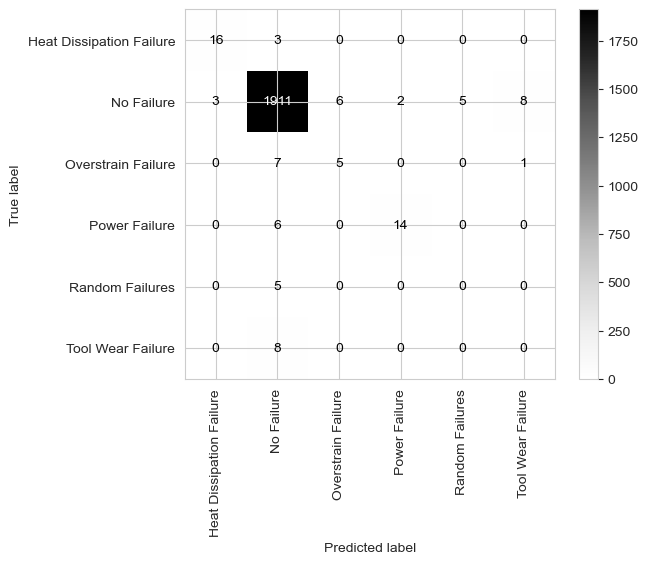

In [220]:
# Visualize the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Heat Dissipation Failure', 'No Failure', 'Overstrain Failure', 'Power Failure', 'Random Failures', 'Tool Wear Failure'])
disp.plot(cmap='Greys')
plt.xticks(rotation=90)
plt.show()

===========================================================================================================================
Part 2:     Model based on complete dataset split in three equal parts, handled trained individually
===========================================================================================================================

In [221]:
# Randomly split the dataset in approx. 3 thirds - done only once - therefore commented!
# df_part1 = df.sample(frac=1/3, random_state=1)
# df_part2 = df.drop(df_part1.index).sample(frac=1/2, random_state=1)
# df_part3 = df.drop(df_part1.index).drop(df_part2.index)

In [222]:
# Save splitted datasets to csv (for re-use) - done only once - therefore commented!
# df_part1.to_csv('df_part1.csv')
# df_part2.to_csv('df_part2.csv')
# df_part3.to_csv('df_part3.csv')

In [223]:
# Re-import randomly splitted data frames (equal sources for various tests)
df_part1 = pd.read_csv('df_part1.csv')
df_part2 = pd.read_csv('df_part2.csv')
df_part3 = pd.read_csv('df_part3.csv')

In [224]:
df_part1.head()

,Unnamed: 0,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Failure Type Cat
0,9953,9954,L57133,L,298.1,307.8,1565,35.3,119,0,No Failure,1
1,3850,3851,M18710,M,302.3,311.0,1421,41.3,182,0,No Failure,1
2,4962,4963,M19822,M,304.0,312.7,1456,51.2,160,0,No Failure,1
3,3886,3887,L51066,L,302.4,311.3,1392,50.5,51,0,No Failure,1
4,5437,5438,M20297,M,302.9,312.6,1394,46.4,82,0,No Failure,1


In [225]:
df_part2.head()

,Unnamed: 0,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Failure Type Cat
0,7826,7827,L55006,L,299.8,311.1,1300,64.2,165,0,No Failure,1
1,4914,4915,M19774,M,303.5,312.3,1532,41.7,32,0,No Failure,1
2,7947,7948,L55127,L,300.8,311.7,1426,45.5,16,0,No Failure,1
3,677,678,L47857,L,297.9,309.2,1478,39.7,10,0,No Failure,1
4,355,356,L47535,L,297.6,308.3,1623,36.9,61,0,No Failure,1


In [226]:
df_part3.head()

,Unnamed: 0,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Failure Type Cat
0,0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure,1
1,2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure,1
2,11,12,H29425,H,298.6,309.1,1423,44.3,29,0,No Failure,1
3,13,14,M14873,M,298.6,309.2,1742,30.0,37,0,No Failure,1
4,19,20,M14879,M,298.9,309.3,1632,32.5,55,0,No Failure,1


In [227]:
# Split dataset in training and test part
df_train1, df_test1 = train_test_split(df_part1, train_size=0.8)
df_train1.shape

(2666, 12)

In [228]:
df_test1.shape

(667, 12)

In [229]:
df_train2, df_test2 = train_test_split(df_part2, train_size=0.8)
df_train2.shape

(2667, 12)

In [230]:
df_test2.shape

(667, 12)

In [231]:
df_train3, df_test3 = train_test_split(df_part3, train_size=0.8)
df_train3.shape

(2666, 12)

In [232]:
df_test3.shape

(667, 12)

In [233]:
# Decision tree classifier
clf1 = DecisionTreeClassifier(random_state=0)
clf2 = DecisionTreeClassifier(random_state=0)
clf3 = DecisionTreeClassifier(random_state=0)

In [234]:
# Train model based on features (X) for output (y) 1/3
clf1.fit(X=df_train1[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']], y=df_train1['Failure Type Cat'])

DecisionTreeClassifier(random_state=0)

In [235]:
# Predict behaviour based on trained model 1/3
y_pred1 = clf1.predict(X=df_test1[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']])
y_pred1[:100]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2])

In [236]:
# Create a decision tree 1/3
# plt.figure(figsize=(10,5))
# tree.plot_tree(clf1, feature_names=['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'], class_names=['Heat Dissipation Failure', 'No Failure', 'Overstrain Failure', 'Power Failure', 'Random Failures', 'Tool Wear Failure'])
# plt.show()

In [237]:
# Train model based on features (X) for output (y) 2/3
clf2.fit(X=df_train2[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']], y=df_train2['Failure Type Cat'])

DecisionTreeClassifier(random_state=0)

In [238]:
# Predict behaviour based on trained model 2/3
y_pred2 = clf2.predict(X=df_test2[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']])
y_pred2[:100]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [239]:
# Create a decision tree 2/3
# plt.figure(figsize=(10,5))
# tree.plot_tree(clf2, feature_names=['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'], class_names=['Heat Dissipation Failure', 'No Failure', 'Overstrain Failure', 'Power Failure', 'Random Failures', 'Tool Wear Failure'])
# plt.show()

In [240]:
# Train model based on features (X) for output (y) 3/3
clf3.fit(X=df_train3[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']], y=df_train3['Failure Type Cat'])

DecisionTreeClassifier(random_state=0)

In [241]:
# Predict behaviour based on trained model 3/3
y_pred3 = clf3.predict(X=df_test3[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']])
y_pred3[:100]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [242]:
# Create a decision tree 3/3
# plt.figure(figsize=(10,5))
# tree.plot_tree(clf3, feature_names=['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'], class_names=['Heat Dissipation Failure', 'No Failure', 'Overstrain Failure', 'Power Failure', 'Random Failures', 'Tool Wear Failure'])
# plt.show()

In [243]:
# Create a confusion matrix
cm1 = confusion_matrix(df_test1['Failure Type Cat'], y_pred1)
cm1

array([[  3,   3,   1,   0,   0,   0],
       [  4, 629,   3,   2,   2,   2],
       [  0,   5,   4,   1,   0,   0],
       [  0,   1,   0,   4,   0,   0],
       [  0,   3,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0]])

In [244]:
cm2 = confusion_matrix(df_test2['Failure Type Cat'], y_pred2)
cm2

array([[  7,   2,   0,   0,   1,   0],
       [  1, 632,   2,   1,   1,   1],
       [  1,   4,   2,   0,   0,   0],
       [  1,   5,   1,   4,   0,   0],
       [  0,   0,   0,   0,   0,   0],
       [  0,   1,   0,   0,   0,   0]])

In [245]:
cm3 = confusion_matrix(df_test3['Failure Type Cat'], y_pred3)
cm3

array([[  6,   0,   0,   0,   0,   0],
       [  1, 644,   3,   0,   1,   1],
       [  0,   1,   0,   0,   0,   0],
       [  0,   4,   0,   3,   0,   0],
       [  0,   0,   0,   0,   0,   0],
       [  0,   3,   0,   0,   0,   0]])

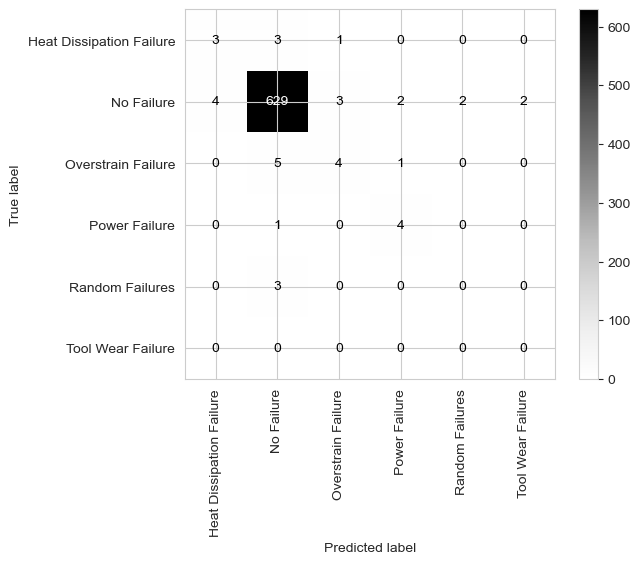

In [246]:
# Visualize the confusion matrix
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=['Heat Dissipation Failure', 'No Failure', 'Overstrain Failure', 'Power Failure', 'Random Failures', 'Tool Wear Failure'])
disp1.plot(cmap='Greys')
plt.xticks(rotation=90)
plt.show()

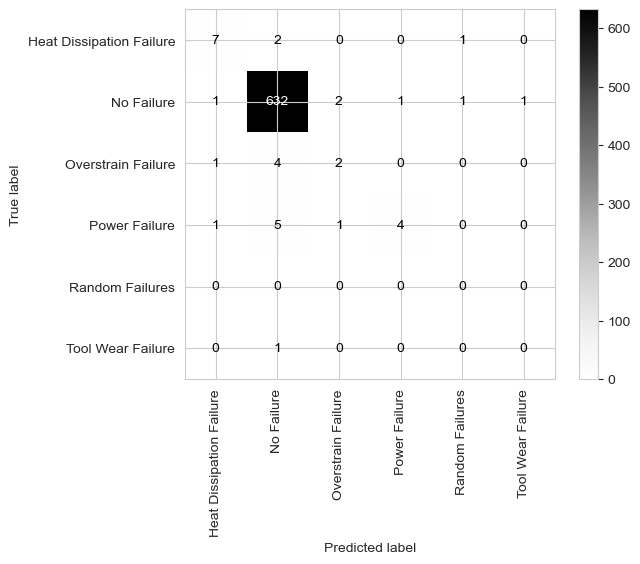

In [247]:
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=['Heat Dissipation Failure', 'No Failure', 'Overstrain Failure', 'Power Failure', 'Random Failures', 'Tool Wear Failure'])
disp2.plot(cmap='Greys')
plt.xticks(rotation=90)
plt.show()

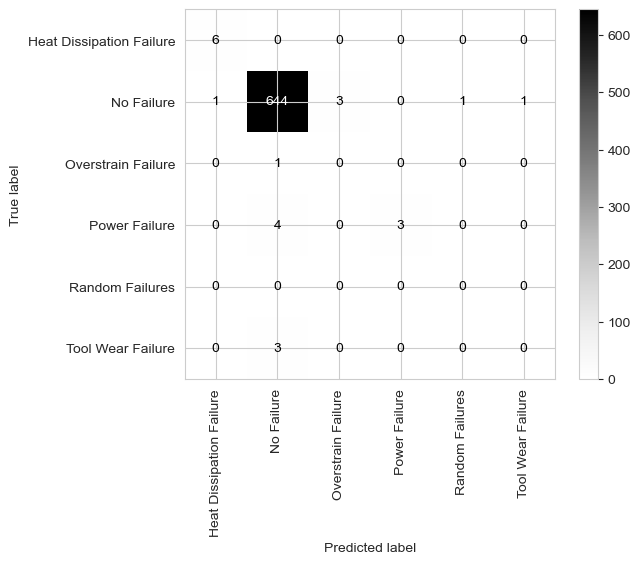

In [248]:
disp3 = ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=['Heat Dissipation Failure', 'No Failure', 'Overstrain Failure', 'Power Failure', 'Random Failures', 'Tool Wear Failure'])
disp3.plot(cmap='Greys')
plt.xticks(rotation=90)
plt.show()

In [249]:
# Check accuracy of model
from sklearn.metrics import accuracy_score
acc1 = accuracy_score(df_test1['Failure Type Cat'], y_pred1)
acc2 = accuracy_score(df_test2['Failure Type Cat'], y_pred2)
acc3 = accuracy_score(df_test3['Failure Type Cat'], y_pred3)
print(f'The accuracy of the complete ds is {acc*100:.2f}%.')
print(f'The accuracy of part 1 is {acc1*100:.2f}%.')
print(f'The accuracy of part 2 is {acc2*100:.2f}%.')
print(f'The accuracy of part 3 is {acc3*100:.2f}%.')

The accuracy of the complete ds is 97.30%.
The accuracy of part 1 is 95.95%.
The accuracy of part 2 is 96.70%.
The accuracy of part 3 is 97.90%.
